## Análisis de datos de Recursos Humanos

### Descripción de los datos


* Employee Name :Nombre completo del empleado
* EmpID : La identificación del empleado es única para cada empleado
* MarriedID : ¿La persona está casada (1 o 0 para sí o no)?
* MaritalStatusID : Código de estado civil que coincide con el campo de texto MaritalDesc
* EmpStatusID : Código de estado laboral que coincide con el campo de texto EstadoEmpleo
* DeptID : Código de identificación de departamento que coincide con el departamento en el que trabaja el empleado
* PerfScoreID : Código de puntuación de rendimiento que coincide con la puntuación de rendimiento más reciente del empleado
* FromDiversityJobFairID :¿El empleado provino de la feria de empleo de Diversidad? 1 o 0 para sí o no
* PayRate : La tarifa de pago por hora de la persona. Todos los salarios se convierten a salario por hora.
* Termd : ¿Se ha despedido a esta empleada/o - 1 o 0?
* PositionID : Un número entero que indica la posición de la persona.
* Position : El nombre/título del texto del puesto que tiene la persona.
* State :El estado en el que vive la persona.
* Zip : El código postal para la empleada/o.
* DOB : Fecha de nacimiento de la empleada/o
* Sex : Sexo - M o F
* MaritalDesc : El estado civil de la persona (divorciado, soltero, viudo, separado, etc)
* CitizenDesc : Etiqueta para indicar si la persona es ciudadano o no ciudadano elegible
* HispanicLatino : Campo Sí o No para determinar si el empleado es hispano/latino
* RaceDesc : Descripción/texto de la raza con la que se identifica la persona
* DateofHire : Fecha en que la persona fue contratada
* DateofTermination : Fecha en que se despidió a la persona, solo se completa si, de hecho, Termd = 1
* TermReason : Un texto/descripción del motivo por el que se despidió a la persona
* EmploymentStatus : Una descripción/categoría de la situación laboral de la persona. Alguien que actualmente trabaja a tiempo * completo = Activo
* Department : Nombre del departamento en el que trabaja la persona.
* ManagerName : El nombre de la/El gerente inmediata/o de la persona.
* ManagerID : Un identificador único para cada gerente.
* RecruitmentSource : El nombre de la fuente de contratación donde se reclutó al empleado.
* PerformanceScore : Texto/categoría de puntuación de rendimiento(Fully Meets, Partially Meets, PIP, Exceeds)
* EngagementSurvey : Resultados de la última encuesta de participación, gestionada por nuestro socio externo
* EmpSatisfaction : Una puntuación de satisfacción básica entre 1 y 5, según lo informado en una reciente encuesta de         satisfacción de los empleados.
* SpecialProjectsCount : El número de proyectos especiales en los que trabajó el empleado durante los últimos 6 mes
* LastPerformanceReviewDate : La fecha más reciente de la última revisión de desempeño de la persona.
* DaysLateLast30 : El número de veces que el empleado llegó tarde al trabajo durante los últimos 30 días.


### * Importación de Librerías



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import datetime
from datetime import timedelta
import plotly.express as px
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D



###  Lectura de datos


In [28]:
#leo csv
df= pd.read_csv('HRDataset_v14.csv')
df.head().style.set_caption("District Dataframe").set_properties(**{'background-color': 'grey',
                           'color': 'black','border': '1px  solid white'})

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,nan,N/A-StillEmployed,Active,Production,Michael Albert,22.000000,LinkedIn,Exceeds,4.600000,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.000000,Indeed,Fully Meets,4.960000,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.000000,LinkedIn,Fully Meets,3.020000,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,nan,N/A-StillEmployed,Active,Production,Elijiah Gray,16.000000,Indeed,Fully Meets,4.840000,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.000000,Google Search,Fully Meets,5.000000,4,0,2/1/2016,0,2




###  Limpieza de Datos

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [15]:
df.isnull()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
308,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
309,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
df.dropna()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
10,"Baczenski, Rachael",10252,1,1,0,5,5,3,1,54670,...,David Stanley,14.0,Diversity Job Fair,Fully Meets,4.20,4,0,1/30/2016,0,12
11,"Barbara, Thomas",10242,1,1,1,5,5,3,1,47211,...,Kissy Sullivan,20.0,Diversity Job Fair,Fully Meets,4.20,3,0,5/6/2016,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,"Wilber, Barry",10048,1,1,1,5,5,3,0,55140,...,Amy Dunn,11.0,Website,Fully Meets,5.00,3,0,2/15/2015,0,7
302,"Wilkes, Annie",10204,0,2,0,5,5,3,0,58062,...,Ketsia Liebig,19.0,Google Search,Fully Meets,3.60,5,0,2/6/2011,0,9
303,"Williams, Jacquelyn",10264,0,0,0,5,5,3,1,59728,...,Ketsia Liebig,19.0,Diversity Job Fair,Fully Meets,4.30,4,0,6/2/2014,0,16
304,"Winthrop, Jordan",10033,0,0,1,5,5,4,0,70507,...,Brannon Miller,12.0,LinkedIn,Exceeds,5.00,3,0,1/19/2016,0,7


In [25]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
306    False
307    False
308    False
309    False
310    False
Length: 311, dtype: bool

In [5]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [11]:
df.tail()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11
310,"Zima, Colleen",10271,0,4,0,1,5,3,0,45046,...,David Stanley,14.0,LinkedIn,Fully Meets,4.50,5,0,1/30/2019,0,2


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmpID,311.0,10156.000000,89.922189,10001.00,10078.50,10156.00,10233.5,10311.0
MarriedID,311.0,0.398714,0.490423,0.00,0.00,0.00,1.0,1.0
MaritalStatusID,311.0,0.810289,0.943239,0.00,0.00,1.00,1.0,4.0
GenderID,311.0,0.434084,0.496435,0.00,0.00,0.00,1.0,1.0
EmpStatusID,311.0,2.392283,1.794383,1.00,1.00,1.00,5.0,5.0
DeptID,311.0,4.610932,1.083487,1.00,5.00,5.00,5.0,6.0
PerfScoreID,311.0,2.977492,0.587072,1.00,3.00,3.00,3.0,4.0
FromDiversityJobFairID,311.0,0.093248,0.291248,0.00,0.00,0.00,0.0,1.0
Salary,311.0,69020.684887,25156.636930,45046.00,55501.50,62810.00,72036.0,250000.0
Termd,311.0,0.334405,0.472542,0.00,0.00,0.00,1.0,1.0


###  EDA (Análisis exploratorio de datos)

 ###  Cantidad de empleados por Departamento

In [28]:
df['Department'].value_counts()

Department
Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: count, dtype: int64

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Production       '),
  Text(1, 0, 'IT/IS'),
  Text(2, 0, 'Software Engineering'),
  Text(3, 0, 'Admin Offices'),
  Text(4, 0, 'Sales'),
  Text(5, 0, 'Executive Office')])

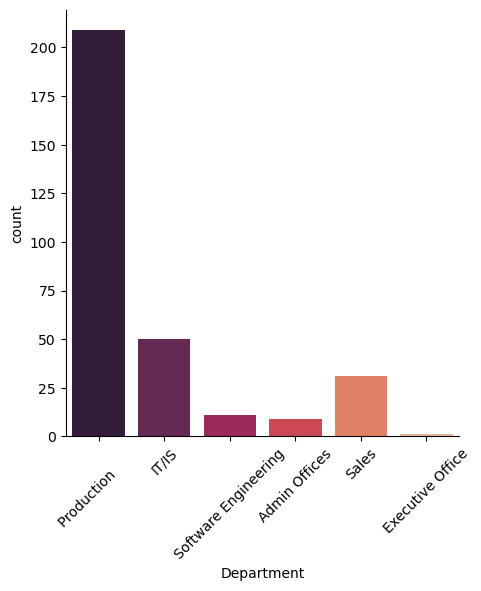

In [4]:
#gráfico
color_palette = sns.color_palette("rocket")
sns.set_palette(color_palette)
sns.catplot(x= 'Department',kind='count',data=df)
plt.xticks(rotation=45)

### Distribución por edades y género

In [5]:
df['Sex'].value_counts()

Sex
F     176
M     135
Name: count, dtype: int64

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


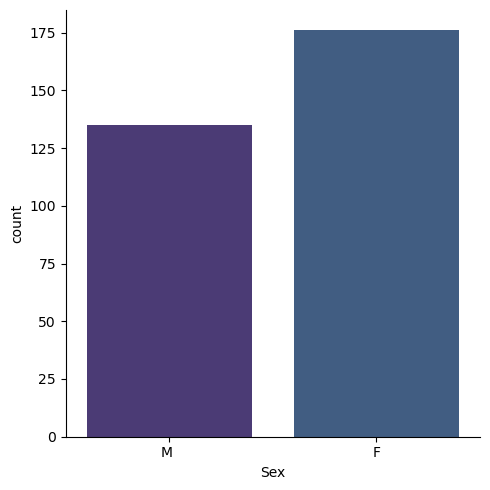

In [6]:
color_palette = sns.color_palette("viridis")
sns.set_palette(color_palette)
sns.catplot(x= 'Sex',kind='count',data=df)

In [55]:
#Por edades
df["DOB"]

0      07/10/83
1      05/05/75
2      09/19/88
3      09/27/88
4      09/08/89
         ...   
306    05/11/85
307    05/04/82
308    08/30/79
309    02/24/79
310    08/17/78
Name: DOB, Length: 311, dtype: object

In [7]:
import datetime
from datetime import date,datetime
from dateutil.relativedelta import relativedelta

In [13]:
edades=date.today()
edades=edades.strftime("%Y-%m-%d")

In [14]:
def cambioFechas(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs(relativedelta(d2,d1).years)

In [15]:
d=pd.to_datetime(df["DOB"]).apply(lambda x:x.strftime("%Y-%m-%d"))
df["Age"]=d.apply(lambda x:cambioFechas(x, edades))
df["Age"]

C:\Users\Dell\AppData\Local\Temp\ipykernel_9600\1185252442.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  d=pd.to_datetime(df["DOB"]).apply(lambda x:x.strftime("%Y-%m-%d"))


0      40
1      48
2      35
3      35
4      34
       ..
306    38
307    41
308    44
309    45
310    45
Name: Age, Length: 311, dtype: int64

<Axes: xlabel='Age', ylabel='count'>

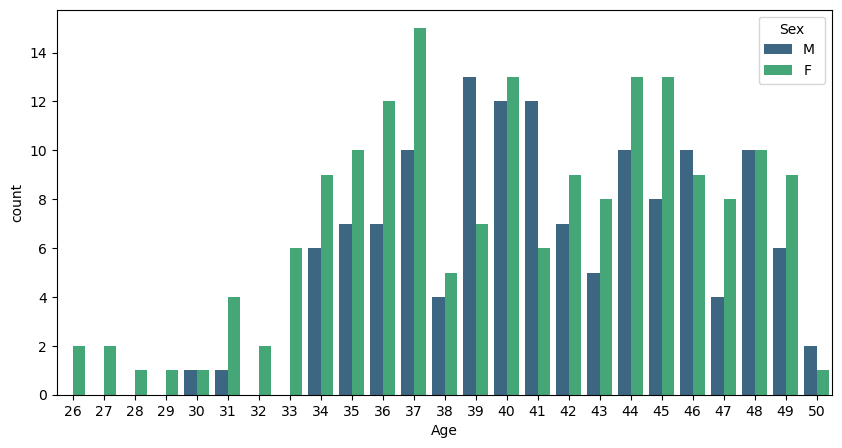

In [16]:
#por edades y género
plt.figure(figsize=(10,5))
sns.countplot(x='Age', data=df, hue = 'Sex', palette='viridis')

### Distribución por puestos y estado(Activo o no)

<Axes: xlabel='count', ylabel='Position'>

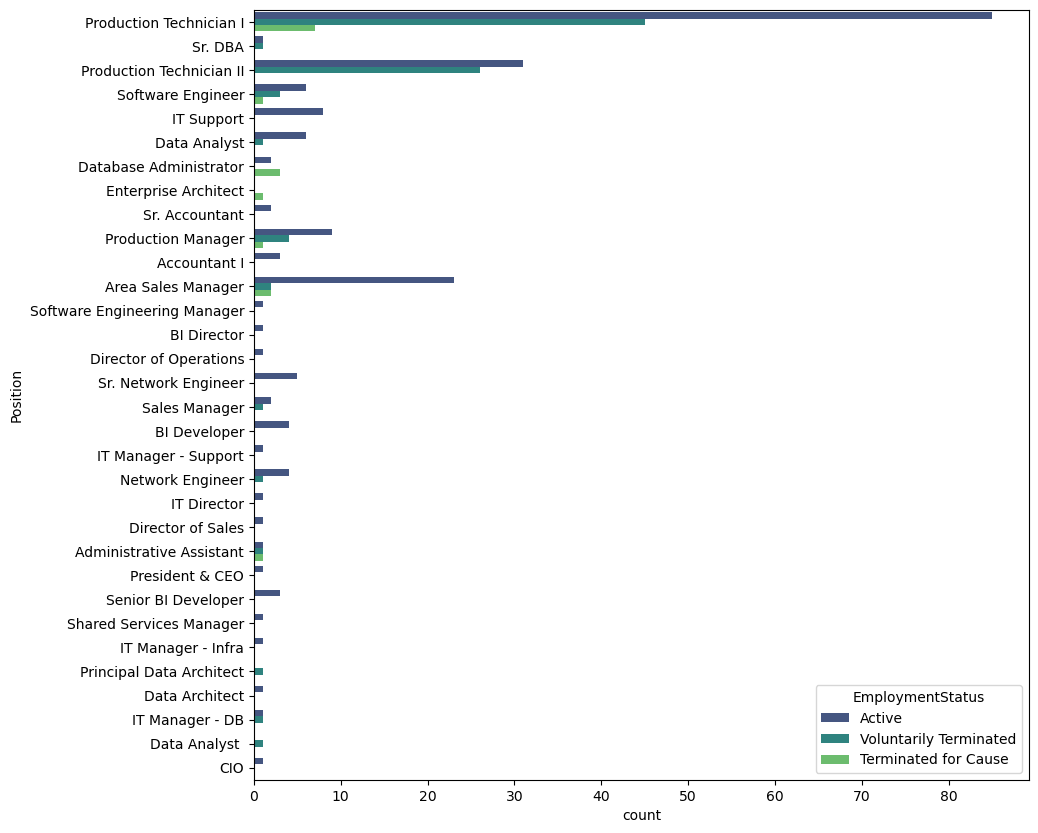

In [17]:

plt.figure(figsize=(10,10))
sns.countplot(y='Position', data=df,  hue = 'EmploymentStatus', palette='viridis')

### Mayor PerformanceScore de los empleados

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Exceeds'),
  Text(1, 0, 'Fully Meets'),
  Text(2, 0, 'Needs Improvement'),
  Text(3, 0, 'PIP')])

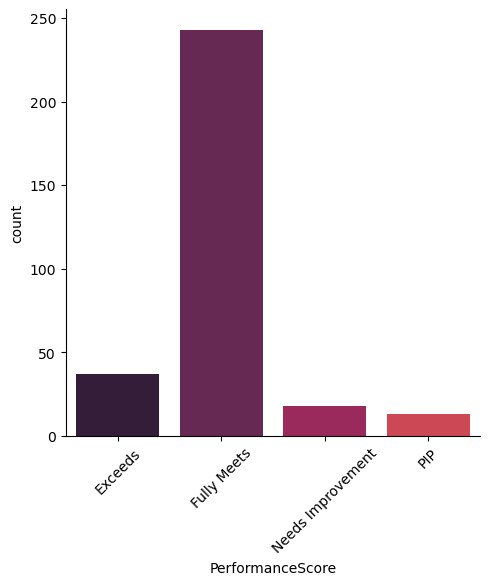

In [18]:
color_palette = sns.color_palette("rocket")
sns.set_palette(color_palette)
sns.catplot(x = "PerformanceScore",kind='count', data = df)
plt.xticks(rotation=45)

### PreformanceScore por Departamento

<Axes: xlabel='PerformanceScore', ylabel='count'>

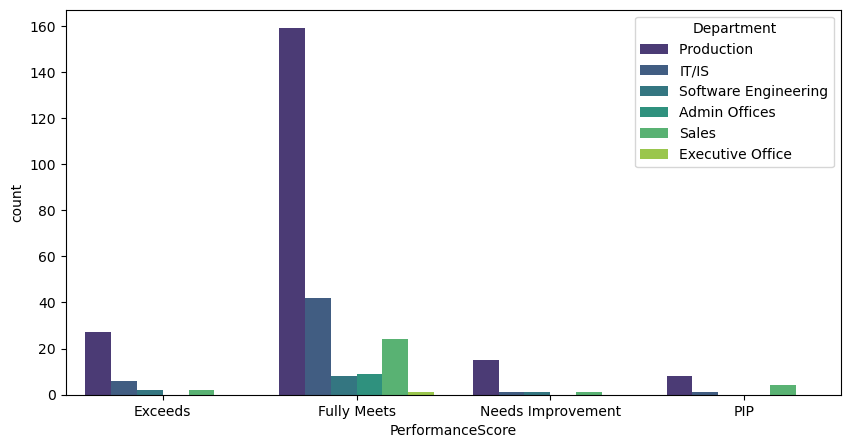

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='PerformanceScore', data=df, hue = 'Department', palette='viridis')

### Salario por Departamento

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Production       '),
  Text(1, 0, 'IT/IS'),
  Text(2, 0, 'Software Engineering'),
  Text(3, 0, 'Admin Offices'),
  Text(4, 0, 'Sales'),
  Text(5, 0, 'Executive Office')])

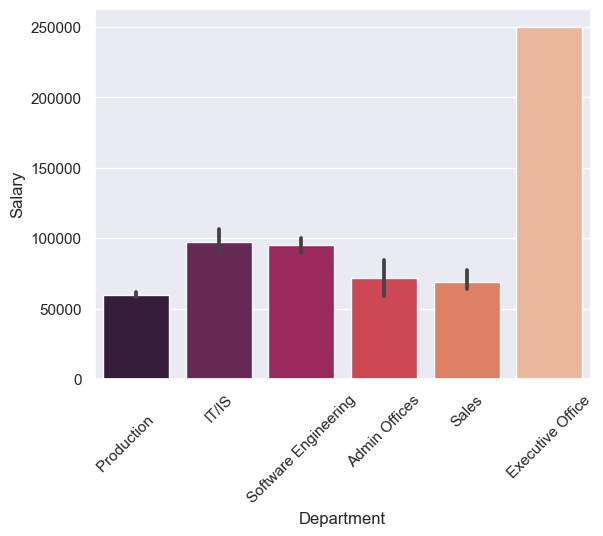

In [49]:
sns.barplot(x='Department',y='Salary',data=df)
plt.xticks(rotation=45)

--- Si bien del Departamento de Produccion es el más grande, es el que menor salario recibe.

### Distribución de salario según género


C:\Users\Dell\AppData\Local\Temp\ipykernel_9600\202163321.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df["Sex"]=="F"),"Salary"],shade=True,color="blue",label="Female",alpha=0.1)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Temp\ipykernel_9600\202163321.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df["Sex"]=="M "),"Salary"],shade=True,color="green",label="Male",alpha=0.1)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na op

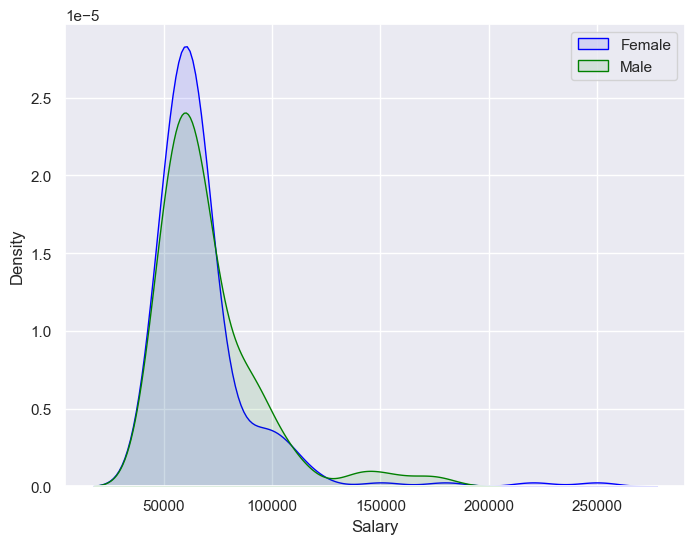

In [20]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.kdeplot(df.loc[(df["Sex"]=="F"),"Salary"],shade=True,color="blue",label="Female",alpha=0.1)
sns.kdeplot(df.loc[(df["Sex"]=="M "),"Salary"],shade=True,color="green",label="Male",alpha=0.1) 
plt.legend()

---  Las mujeres reciben un mejor salario.

### Mejor salario en planta

In [51]:
df.loc[(df["Salary"]==df["Salary"].max()),:]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age
150,"King, Janet",10089,1,1,0,1,2,3,0,250000,...,9.0,Indeed,Fully Meets,4.83,3,0,1/17/2019,0,10,30


--- La funcionaria Janet King posee el mejor salario, en el departamento de Ingeniería de Software.

### Cantidad de empleados que abandonaron la empresa

* Causas de abandono 

In [29]:
#Remover aquellos empleados que aún trabajan en la empresa
remover=df[["EmpID","DateofHire","DateofTermination","TermReason"]].copy()
remover.dropna(inplace=True) 
remover.head()

,EmpID,DateofHire,DateofTermination,TermReason
1,10084,3/30/2015,6/16/2016,career change
2,10196,7/5/2011,9/24/2012,hours
4,10069,7/11/2011,9/6/2016,return to school
10,10252,1/10/2011,1/12/2017,Another position
11,10242,4/2/2012,9/19/2016,unhappy


In [30]:
remover.shape

(104, 4)

--- La empresa ha retenido entre 311 - 104 = 207 empleados.

In [31]:
abandono=pd.DataFrame(remover.groupby("TermReason")["EmpID"].count()).reset_index()
abandono

,TermReason,EmpID
0,Another position,20
1,Fatal attraction,1
2,Learned that he is a gangster,1
3,attendance,7
4,career change,9
5,gross misconduct,1
6,hours,8
7,maternity leave - did not return,3
8,medical issues,3
9,military,4


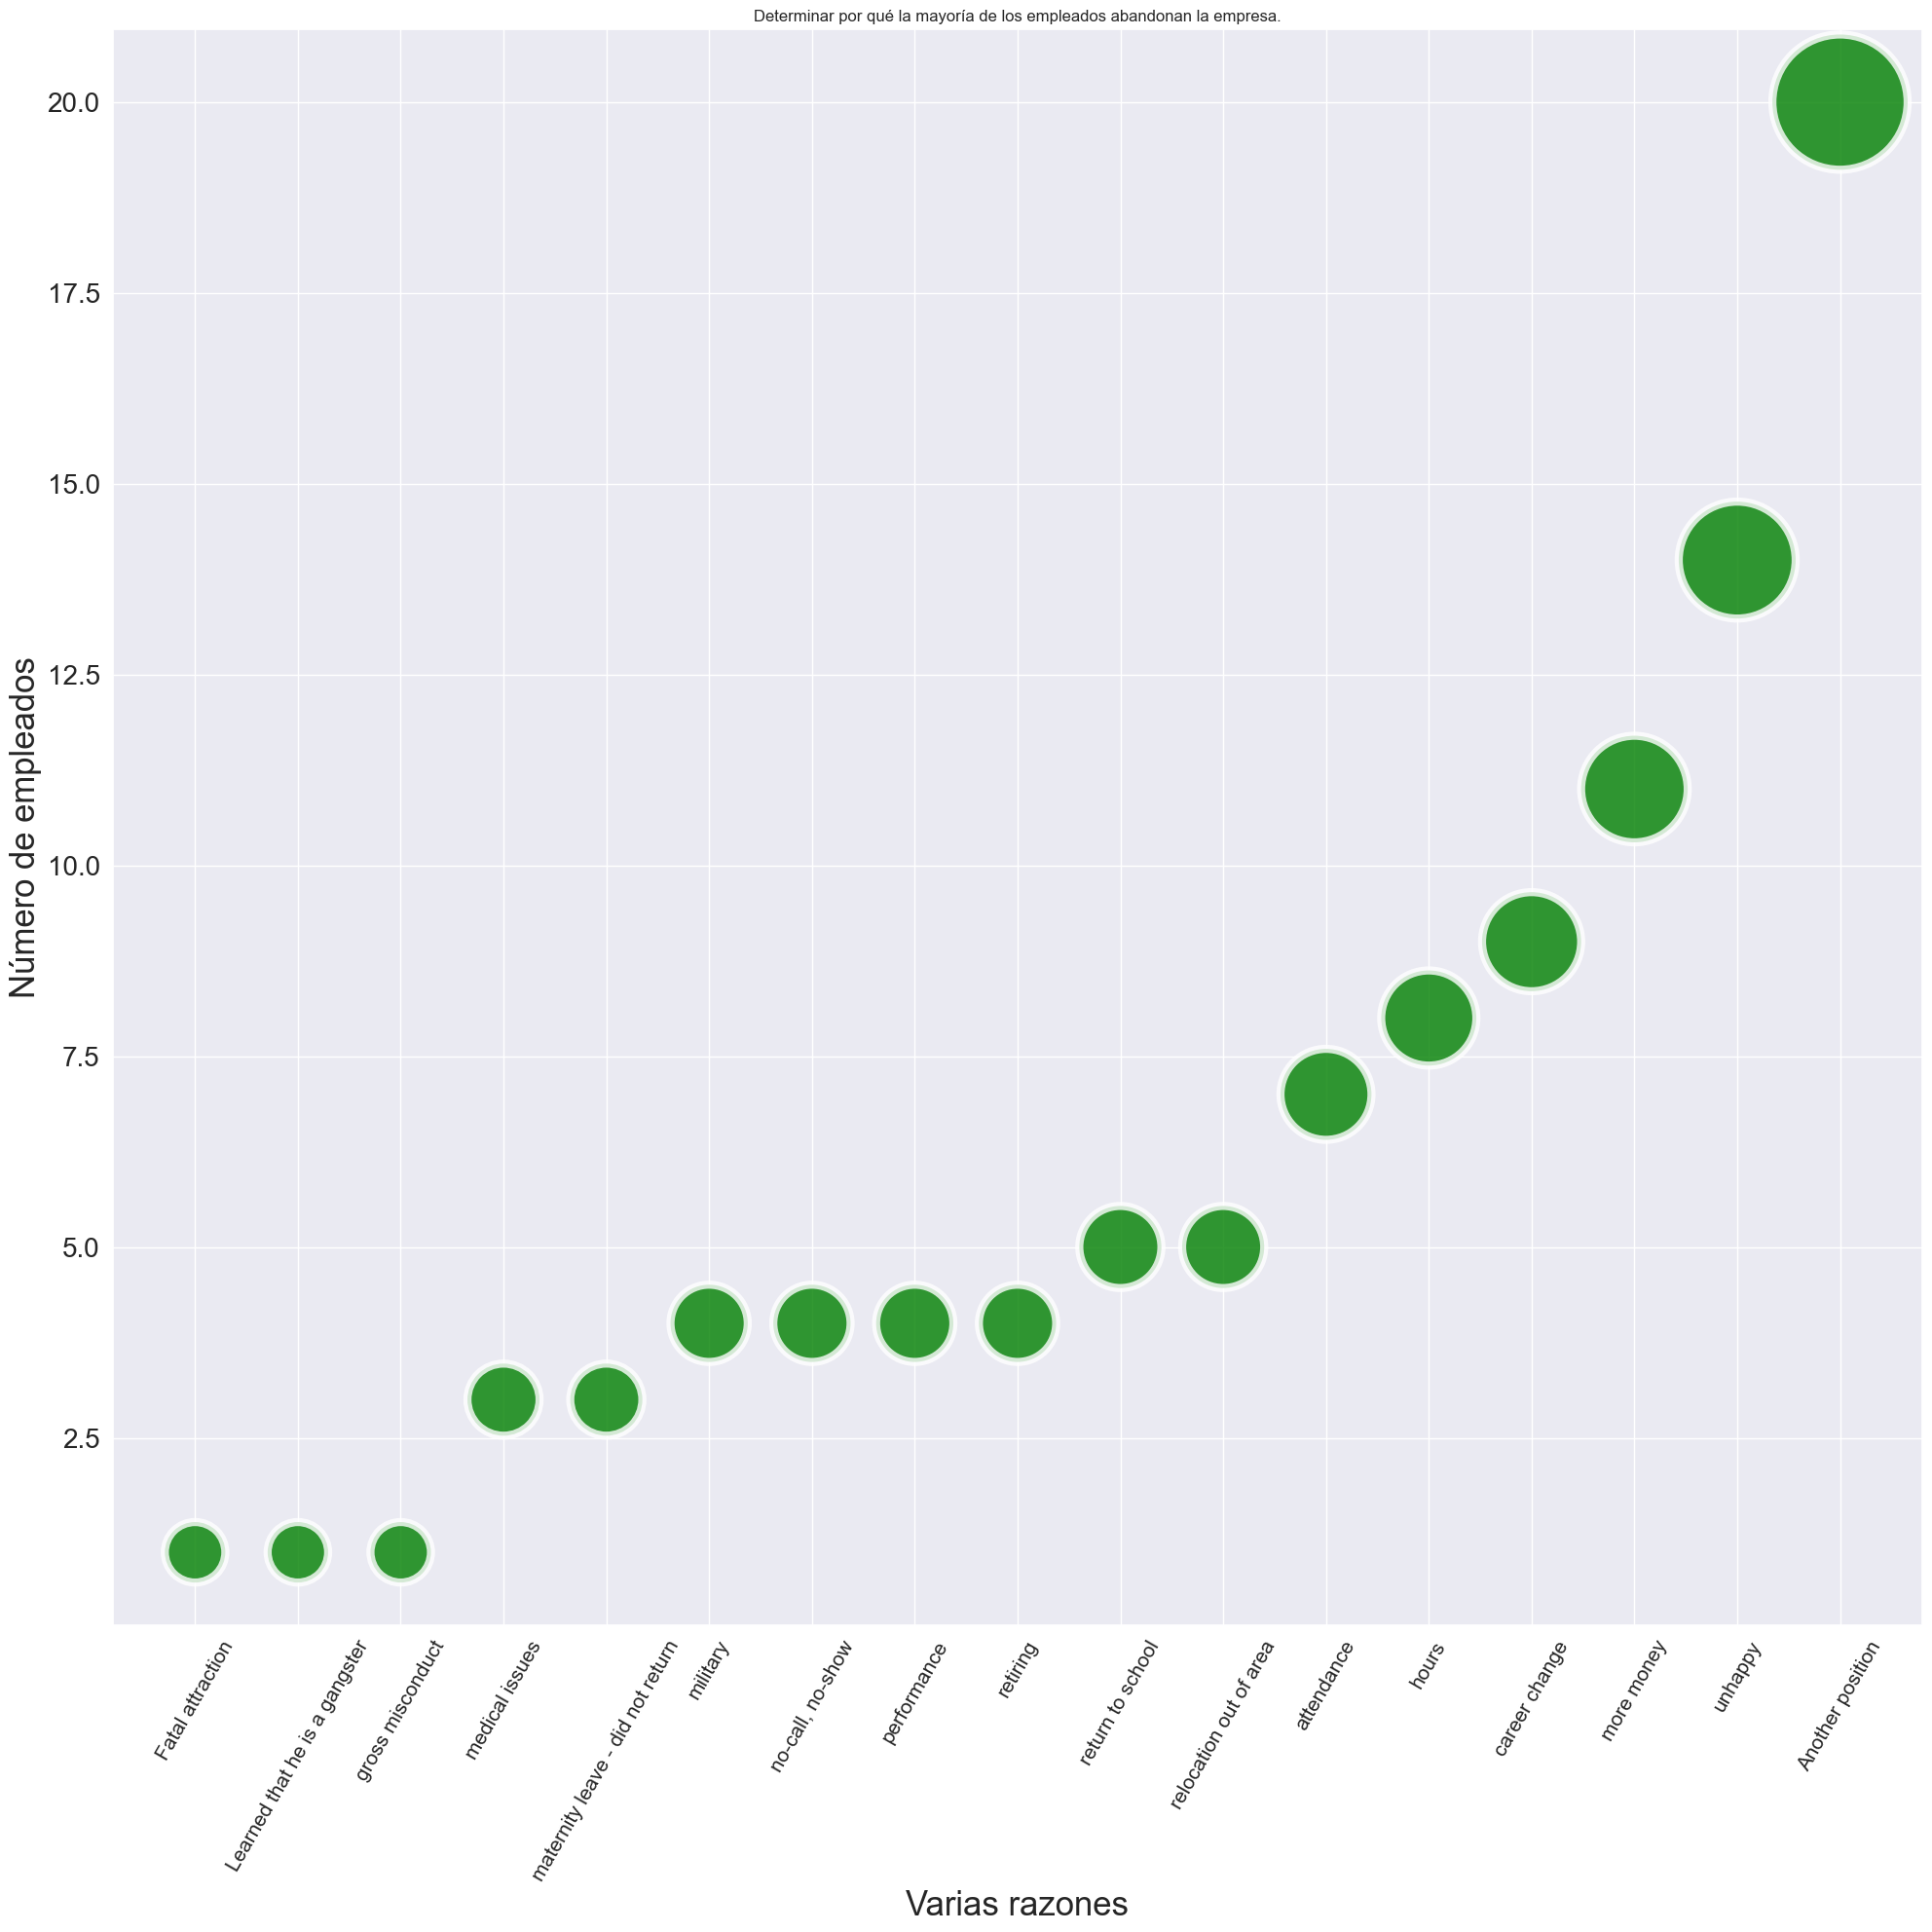

In [24]:
plt.figure(figsize=(20,20))
sns.set_theme()
sns.scatterplot(data=abandono.sort_values(by=["EmpID"]), x="TermReason", y="EmpID", size="EmpID",color="green", legend=False, sizes=(2000, 10000), alpha=0.8, linewidth=6)
plt.xlabel("Varias razones",size=25)
plt.ylabel("Número de empleados",size=25)
plt.title("Determinar por qué la mayoría de los empleados abandonan la empresa.", loc="center")
plt.yticks(fontsize=20) 
plt.xticks(fontsize=15,rotation=60) 
# Gráfico
plt.tight_layout()

Las tres razones principales por las que los empleados abandonaron la empresa fueron:
    
-Una mejor posición en otra empresa que conduzca al crecimiento profesional.

-Falta de satisfacción laboral (infelicidad).

-Un mejor salario ofrecido por empresas rivales.

* Departamento que abandonan.


In [25]:
#Remover empleados que aún trabajan
dep=df[["EmpID","DateofHire","DateofTermination","Department"]].copy()
dep.dropna(inplace=True) 
dep.head()

,EmpID,DateofHire,DateofTermination,Department
1,10084,3/30/2015,6/16/2016,IT/IS
2,10196,7/5/2011,9/24/2012,Production
4,10069,7/11/2011,9/6/2016,Production
10,10252,1/10/2011,1/12/2017,Production
11,10242,4/2/2012,9/19/2016,Production


In [26]:
dep2=pd.DataFrame(dep.groupby("Department")["EmpID"].count()).reset_index()
dep2

,Department,EmpID
0,Admin Offices,2
1,IT/IS,10
2,Production,83
3,Sales,5
4,Software Engineering,4


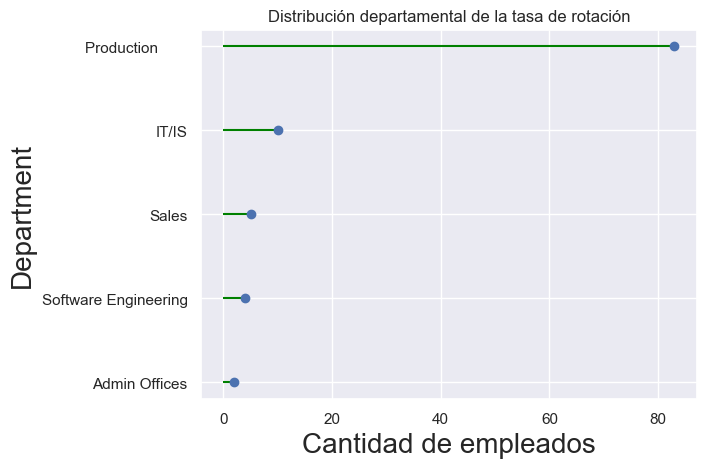

In [27]:
# Ordenar valores
orden = dep2.sort_values(by='EmpID')
rango=range(1,len(dep2.index)+1)
 

plt.hlines(y=rango, xmin=0, xmax=orden['EmpID'], color='green')
plt.plot(orden['EmpID'], rango, "o")
 
# Agregar títulos
plt.yticks(rango, orden['Department'])
plt.title("Distribución departamental de la tasa de rotación", loc='center')
plt.xlabel('Cantidad de empleados',size=20)
plt.ylabel('Department',size=20)

# Gráfico
plt.show()